In [1]:
import csv
import numpy as np 
import pandas as pd
import numpy
import random
import networkx as nx

# Etape1: Nettoyage 

In [2]:
df_2022= pd.read_csv("casablanca_data.csv")

In [3]:
df_2022.columns

Index(['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun'],
      dtype='object')

In [4]:
df_2022

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2022-01-01,17.1,8.0,23.6,0.0,NaN,235,5.9,18.5,1025.3,NaN
1,2022-01-02,14.0,10.3,19.0,NaN,NaN,74,6.2,20.4,1027.3,NaN
2,2022-01-03,14.6,12.8,17.1,0.0,NaN,13,5.6,18.5,1025.6,NaN
3,2022-01-04,13.8,8.3,19.0,NaN,NaN,236,11.7,29.6,1023.2,NaN
4,2022-01-05,15.4,12.0,17.2,0.0,NaN,37,9.9,25.9,1023.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,15.6,11.6,21.0,0.0,NaN,126,5.4,18.5,1024.5,NaN
361,2022-12-28,15.1,10.3,18.3,0.0,NaN,229,8.1,22.2,1024.9,NaN
362,2022-12-29,15.8,10.0,20.5,0.0,NaN,160,7.6,20.4,1026.3,NaN
363,2022-12-30,17.4,9.8,24.5,0.0,NaN,195,5.9,20.4,1025.9,NaN


In [5]:
df_2022.isna().sum()

date      0
tavg      0
tmin      0
tmax      0
prcp     31
snow    365
wdir      0
wspd      0
wpgt     12
pres      0
tsun    365
dtype: int64

In [6]:
df_2022=df_2022.drop('snow',axis=1)
df_2022=df_2022.drop('tsun',axis=1)

In [7]:
df_2022

,date,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
0,2022-01-01,17.1,8.0,23.6,0.0,235,5.9,18.5,1025.3
1,2022-01-02,14.0,10.3,19.0,NaN,74,6.2,20.4,1027.3
2,2022-01-03,14.6,12.8,17.1,0.0,13,5.6,18.5,1025.6
3,2022-01-04,13.8,8.3,19.0,NaN,236,11.7,29.6,1023.2
4,2022-01-05,15.4,12.0,17.2,0.0,37,9.9,25.9,1023.9
...,...,...,...,...,...,...,...,...,...
360,2022-12-27,15.6,11.6,21.0,0.0,126,5.4,18.5,1024.5
361,2022-12-28,15.1,10.3,18.3,0.0,229,8.1,22.2,1024.9
362,2022-12-29,15.8,10.0,20.5,0.0,160,7.6,20.4,1026.3
363,2022-12-30,17.4,9.8,24.5,0.0,195,5.9,20.4,1025.9


In [8]:
df_2022.isna().sum()

date     0
tavg     0
tmin     0
tmax     0
prcp    31
wdir     0
wspd     0
wpgt    12
pres     0
dtype: int64

In [9]:
df_2022=df_2022.interpolate()

In [10]:
df_2022.isna().sum()

date    0
tavg    0
tmin    0
tmax    0
prcp    0
wdir    0
wspd    0
wpgt    0
pres    0
dtype: int64

In [11]:
df_2022

,date,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
0,2022-01-01,17.1,8.0,23.6,0.0,235,5.9,18.5,1025.3
1,2022-01-02,14.0,10.3,19.0,0.0,74,6.2,20.4,1027.3
2,2022-01-03,14.6,12.8,17.1,0.0,13,5.6,18.5,1025.6
3,2022-01-04,13.8,8.3,19.0,0.0,236,11.7,29.6,1023.2
4,2022-01-05,15.4,12.0,17.2,0.0,37,9.9,25.9,1023.9
...,...,...,...,...,...,...,...,...,...
360,2022-12-27,15.6,11.6,21.0,0.0,126,5.4,18.5,1024.5
361,2022-12-28,15.1,10.3,18.3,0.0,229,8.1,22.2,1024.9
362,2022-12-29,15.8,10.0,20.5,0.0,160,7.6,20.4,1026.3
363,2022-12-30,17.4,9.8,24.5,0.0,195,5.9,20.4,1025.9


In [123]:
df_2022.describe()

,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,20.056164,16.049041,23.260274,0.894795,146.410959,9.645753,29.163014,1017.442192
std,3.895305,4.429637,3.874860,4.352822,119.738799,2.524705,5.038665,4.484751
min,11.900000,4.000000,15.000000,0.000000,1.000000,4.000000,18.500000,1001.700000
25%,16.700000,12.400000,19.900000,0.000000,39.000000,7.800000,25.900000,1014.300000
50%,20.700000,16.700000,23.600000,0.000000,98.000000,9.700000,29.600000,1016.800000
75%,23.200000,19.800000,26.000000,0.000000,262.000000,11.200000,33.300000,1020.100000
max,29.700000,25.500000,35.400000,46.200000,359.000000,21.700000,48.200000,1029.900000


## Étape 2 : Préparer les données - Discrétiser chaque colonne

In [124]:
# Étape 2 : Préparer les données - Discrétiser chaque colonne
def discretize_temp(temp):
    """Discrétisation des températures."""
    if temp < 15:
        return "Froid"
    elif 15 <= temp < 25:
        return "Modéré"
    else:
        return "Chaud"

def discretize_prcp(prcp):
    """Discrétisation des précipitations."""
    if prcp == 0:
        return "Sec"
    elif prcp < 5:
        return "Pluie légère"
    else:
        return "Pluie forte"

def discretize_wspd(wspd):
    """Discrétisation de la vitesse du vent."""
    if wspd < 10:
        return "Faible"
    elif 10 <= wspd < 20:
        return "Modéré"
    else:
        return "Fort"

def discretize_wdir(wdir):
    """Discrétisation de la direction du vent (en degrés)."""
    if wdir < 45 or wdir >= 315:
        return "Nord"
    elif 45 <= wdir < 135:
        return "Est"
    elif 135 <= wdir < 225:
        return "Sud"
    else:
        return "Ouest"

def discretize_wpgt(wpgt):
    """Discrétisation de la vitesse de rafales de vent."""
    if wpgt < 10:
        return "Faible"
    elif 10 <= wpgt < 20:
        return "Modéré"
    else:
        return "Fort"

def discretize_pres(pres):
    """Discrétisation de la pression atmosphérique."""
    if pres < 1005:
        return "Basse"
    elif 1005 <= pres < 1020:
        return "Normale"
    else:
        return "Haute"

### Appliquer la discrétisation


In [125]:
# Appliquer la discrétisation
df_2022['tavg_state'] = df_2022['tavg'].apply(discretize_temp)
df_2022['tmin_state'] = df_2022['tmin'].apply(discretize_temp)
df_2022['tmax_state'] = df_2022['tmax'].apply(discretize_temp)
df_2022['prcp_state'] = df_2022['prcp'].apply(discretize_prcp)
df_2022['wspd_state'] = df_2022['wspd'].apply(discretize_wspd)
df_2022['wdir_state'] = df_2022['wdir'].apply(discretize_wdir)
df_2022['wpgt_state'] = df_2022['wpgt'].apply(discretize_wpgt)
df_2022['pres_state'] = df_2022['pres'].apply(discretize_pres)

## Étape 3 : Construire le graphe des transitions

In [155]:
 #Étape 3 : Construire le graphe des transitions
def build_transition_graph(series):
    """Construit un graphe des transitions pour une série donnée."""
    states = series.unique()
    state_indices = {state: i for i, state in enumerate(states)}
    
    # Créer un graphe orienté
    G = nx.DiGraph()
    
    # Ajouter les nœuds (états)
    G.add_nodes_from(states)
    
    # Compter les transitions
    for i in range(len(series) - 1):
        current_state = series.iloc[i]
        next_state = series.iloc[i + 1]
        
        # Ajouter les arêtes avec les probabilités
        if G.has_edge(current_state, next_state):
            G[current_state][next_state]['weight'] += 1
        else:
            G.add_edge(current_state, next_state, weight=1)
    
    # Normaliser les poids des arêtes pour obtenir des probabilités
    for u, v, data in G.edges(data=True):
        total_weight = sum(d['weight'] for _, _, d in G.edges(u, data=True))
        data['weight'] /= total_weight
    
    return G, states  # Retourner le graphe et les états


### Construire les graphes pour chaque colonne


In [156]:
# Construire les graphes pour chaque colonne
graphs = {}
for col in ['tavg_state', 'tmin_state', 'tmax_state', 'prcp_state', 'wspd_state', 'wdir_state', 'wpgt_state', 'pres_state']:
    graph, states = build_transition_graph(df_2022[col])
    graphs[col] = (graph, states)

### tracer les graphes

In [153]:
def plot_transition_graph(graph, title):
    """Affiche un graphe de transition avec NetworkX."""
    plt.figure(figsize=(8, 6))
    
    # Dessiner le graphe
    pos = nx.spring_layout(graph)  # Positionnement des nœuds
    nx.draw(graph, pos, with_labels=True, node_color="skyblue", node_size=3000, font_size=12, font_weight="bold", edge_color="gray")
    
    # Ajouter les poids sur les arêtes
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title(f"Graphe des transitions - {title}")
    plt.show()

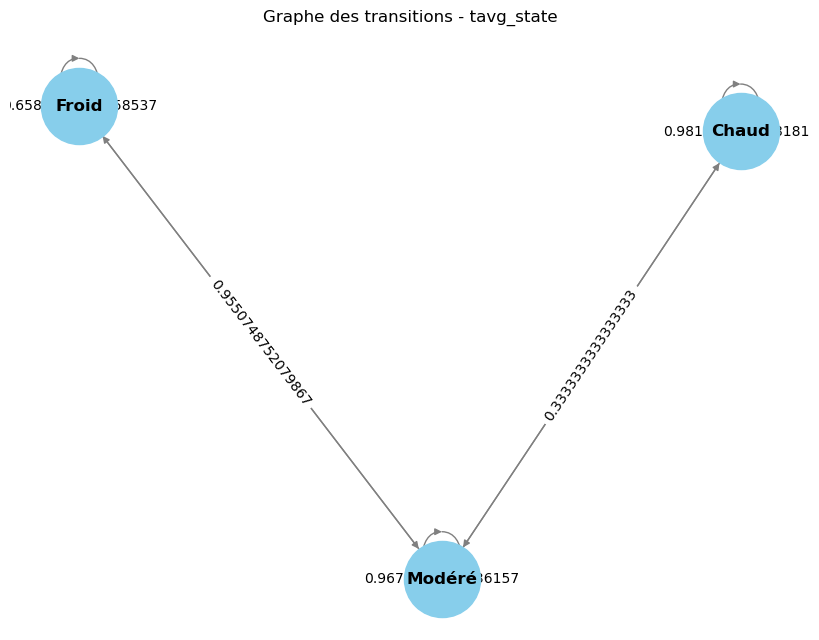

In [133]:
plot_transition_graph(graphs['tavg_state'][0], 'tavg_state')

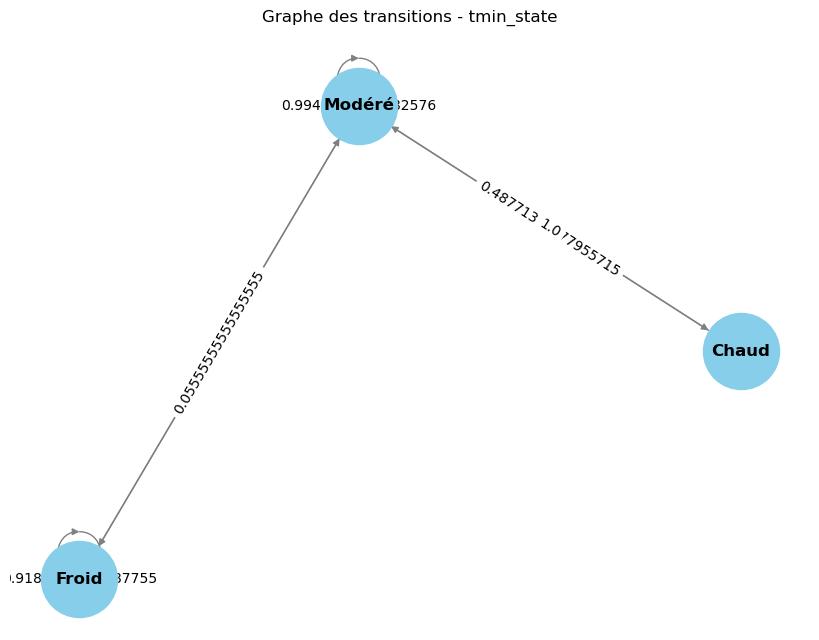

In [145]:
plot_transition_graph(graphs['tmin_state'][0], 'tmin_state')

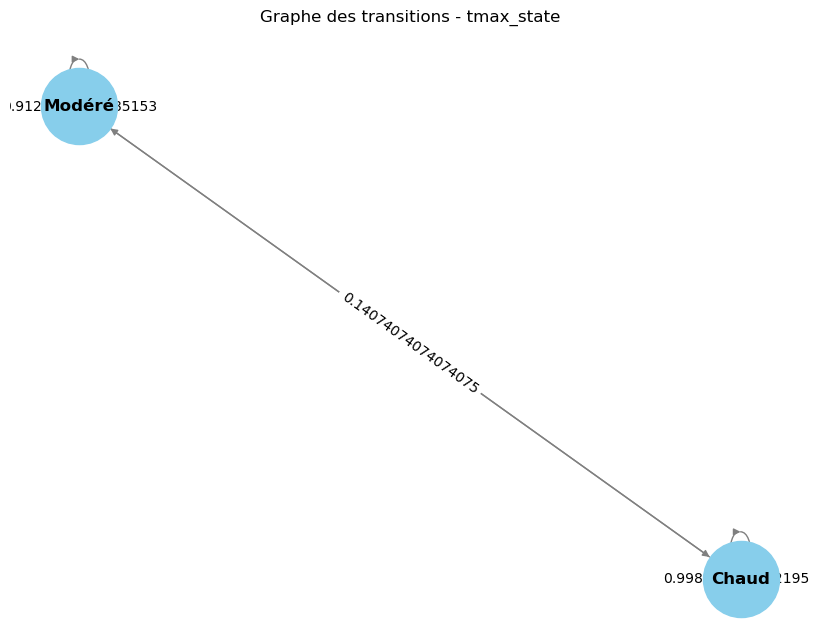

In [144]:
plot_transition_graph(graphs['tmax_state'][0], 'tmax_state')

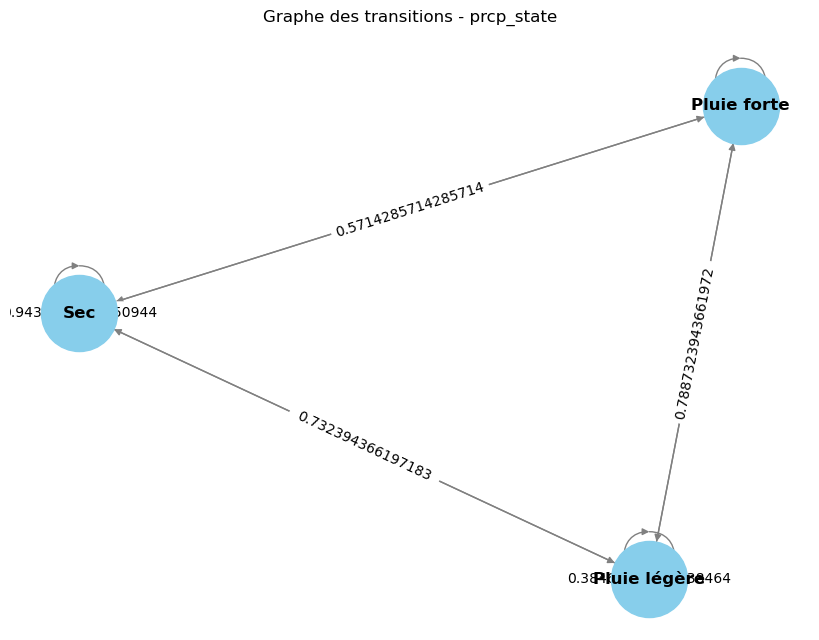

In [143]:
plot_transition_graph(graphs['prcp_state'][0], 'prcp_state')

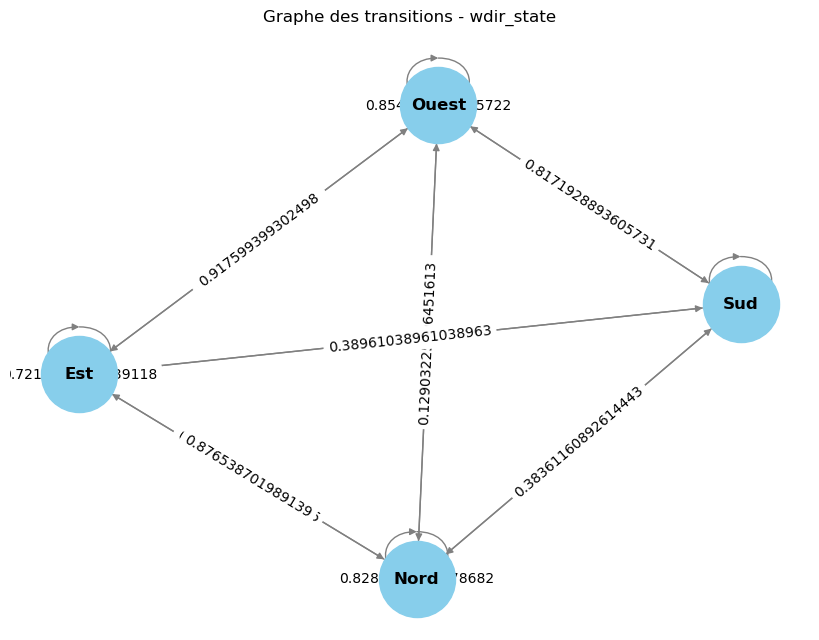

In [138]:
plot_transition_graph(graphs['wdir_state'][0], 'wdir_state')

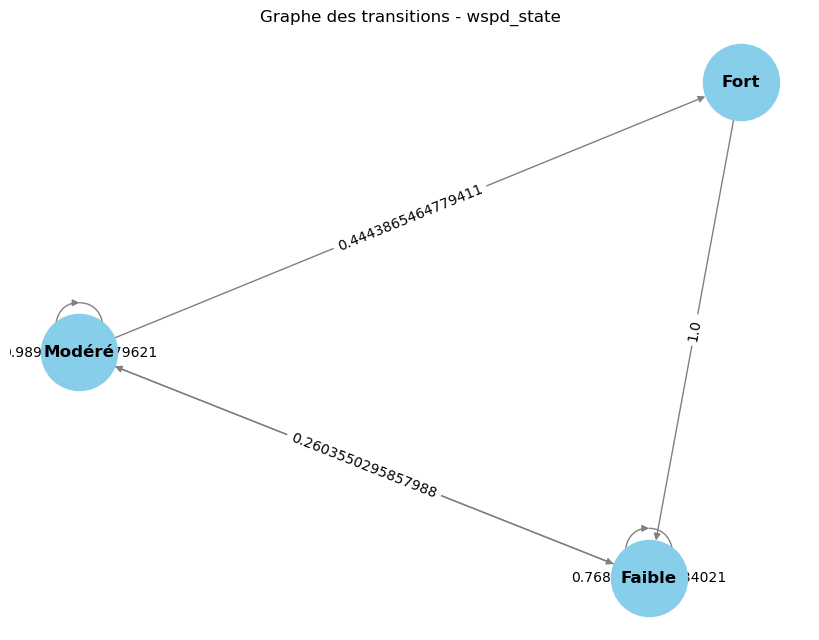

In [139]:
plot_transition_graph(graphs['wspd_state'][0], 'wspd_state')

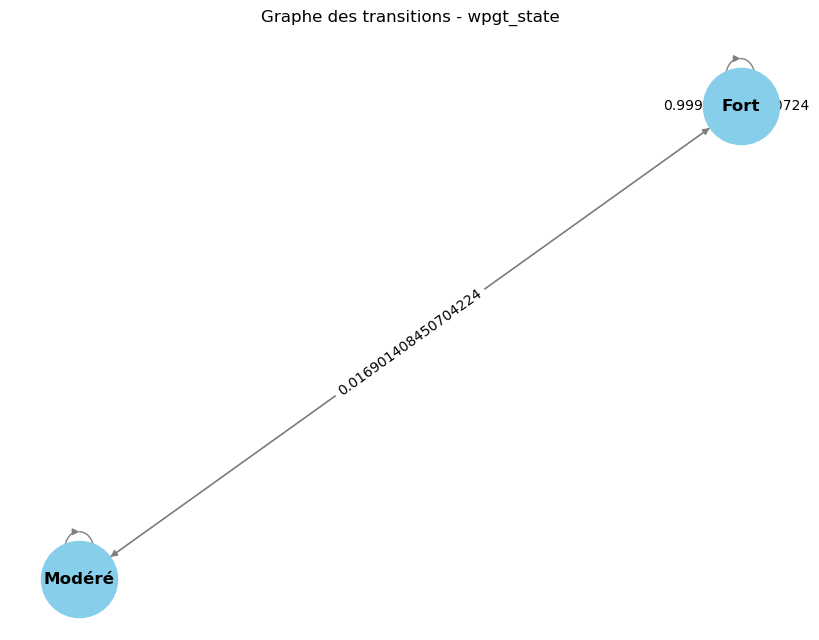

In [141]:
plot_transition_graph(graphs['wpgt_state'][0], 'wpgt_state')

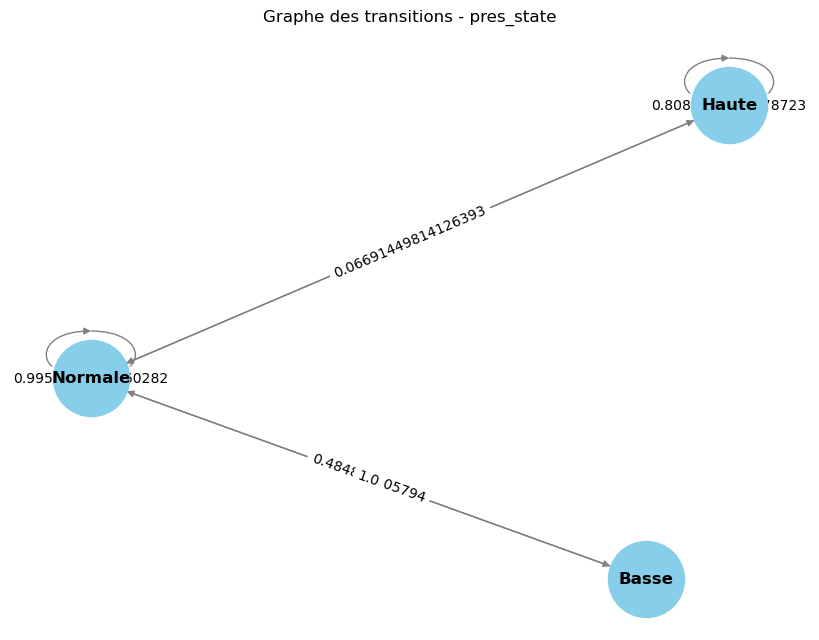

In [157]:
plot_transition_graph(graphs['pres_state'][0], 'pres_state')

## Etape 4: Construire les matrices de transitions

In [158]:
# Fonction pour convertir un graphe de transition en une matrice de transition
def graph_to_transition_matrix(graph, states):
    """Convertit un graphe de transition en une matrice de transition."""
    state_indices = {state: i for i, state in enumerate(states)}
    n_states = len(states)
    
    # Initialiser une matrice de zéros
    transition_matrix = np.zeros((n_states, n_states))
    
    # Remplir la matrice avec les poids des arêtes
    for u, v, data in graph.edges(data=True):
        i, j = state_indices[u], state_indices[v]
        transition_matrix[i, j] = data['weight']
    
    # Convertir la matrice en DataFrame pour une meilleure lisibilité
    transition_df = pd.DataFrame(
        transition_matrix, index=states, columns=states
    )
    return transition_df


In [161]:

# Fonction pour afficher une matrice de transition stylée
def plot_transition_matrix(matrix, title):
    """Affiche une matrice de transition sous forme de carte de chaleur."""
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)
    plt.title(title, fontsize=14)
    plt.xlabel("État suivant", fontsize=12)
    plt.ylabel("État actuel", fontsize=12)
    plt.show()
    

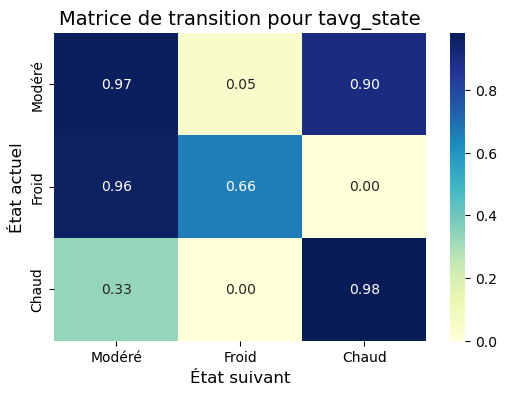

In [165]:
# Obtenir la matrice de transition
transition_matrix = graph_to_transition_matrix(graphs['tavg_state'][0],graphs['tavg_state'][1])
    # Afficher la matrice avec des couleurs
plot_transition_matrix(
    transition_matrix, 
    title=f"Matrice de transition pour {'tavg_state'}"
)


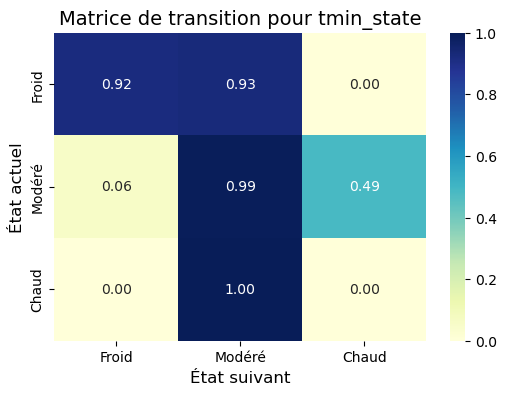

In [166]:
# Obtenir la matrice de transition
transition_matrix = graph_to_transition_matrix(graphs['tmin_state'][0],graphs['tmin_state'][1])
    # Afficher la matrice avec des couleurs
plot_transition_matrix(
    transition_matrix, 
    title=f"Matrice de transition pour {'tmin_state'}"
)

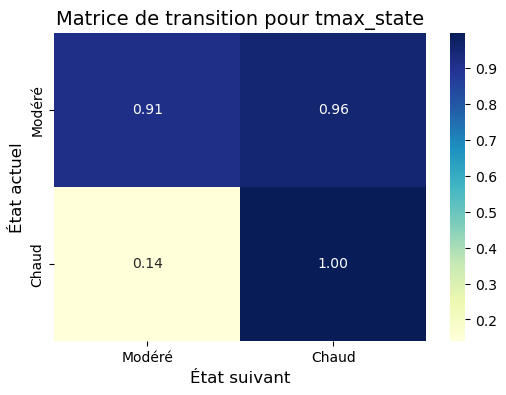

In [167]:
# Obtenir la matrice de transition
transition_matrix = graph_to_transition_matrix(graphs['tmax_state'][0],graphs['tmax_state'][1])
    # Afficher la matrice avec des couleurs
plot_transition_matrix(
    transition_matrix, 
    title=f"Matrice de transition pour {'tmax_state'}"
)

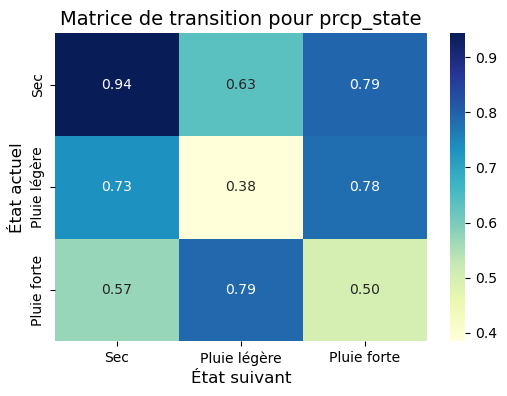

In [168]:
# Obtenir la matrice de transition
transition_matrix = graph_to_transition_matrix(graphs['prcp_state'][0],graphs['prcp_state'][1])
    # Afficher la matrice avec des couleurs
plot_transition_matrix(
    transition_matrix, 
    title=f"Matrice de transition pour {'prcp_state'}"
)

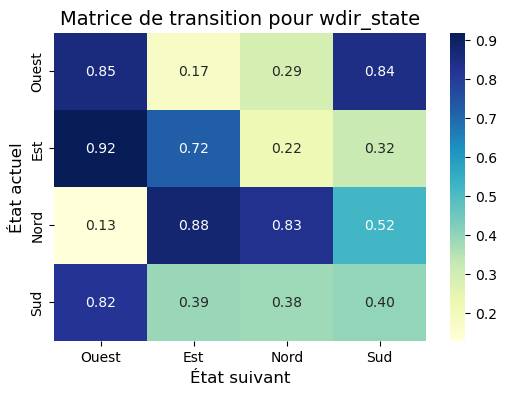

In [169]:
# Obtenir la matrice de transition
transition_matrix = graph_to_transition_matrix(graphs['wdir_state'][0],graphs['wdir_state'][1])
    # Afficher la matrice avec des couleurs
plot_transition_matrix(
    transition_matrix, 
    title=f"Matrice de transition pour {'wdir_state'}"
)

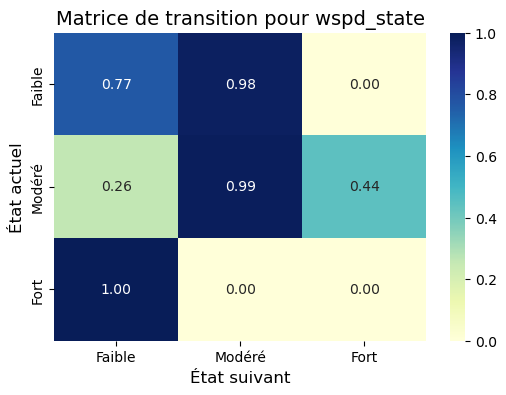

In [170]:
# Obtenir la matrice de transition
transition_matrix = graph_to_transition_matrix(graphs['wspd_state'][0],graphs['wspd_state'][1])
    # Afficher la matrice avec des couleurs
plot_transition_matrix(
    transition_matrix, 
    title=f"Matrice de transition pour {'wspd_state'}"
)

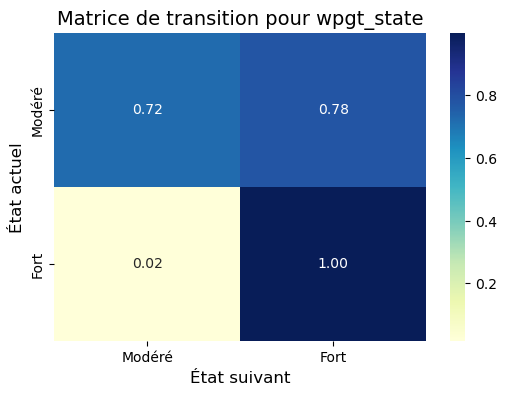

In [173]:
# Obtenir la matrice de transition
transition_matrix = graph_to_transition_matrix(graphs['wpgt_state'][0],graphs['wpgt_state'][1])
    # Afficher la matrice avec des couleurs
plot_transition_matrix(
    transition_matrix, 
    title=f"Matrice de transition pour {'wpgt_state'}"
)

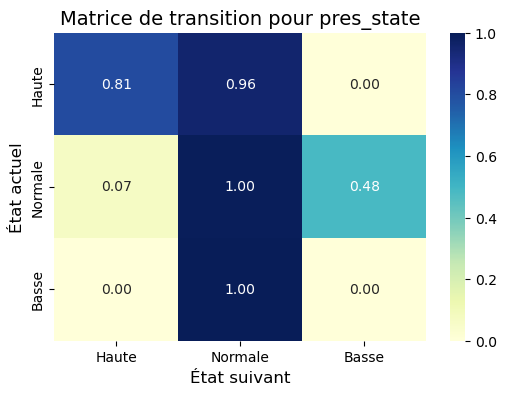

In [174]:
# Obtenir la matrice de transition
transition_matrix = graph_to_transition_matrix(graphs['pres_state'][0],graphs['pres_state'][1])
    # Afficher la matrice avec des couleurs
plot_transition_matrix(
    transition_matrix, 
    title=f"Matrice de transition pour {'pres_state'}"
)

### Simuler les données avec la chaîne de Markov sur le graphe

In [175]:
# Simuler les données avec la chaîne de Markov sur le graphe
def simulate_markov_graph(graph, states, n_steps, start_state=None):
    """Simule une chaîne de Markov à partir d'un graphe."""
    current_state = start_state if start_state else random.choice(states)
    state_sequence = [current_state]

    for _ in range(n_steps - 1):
        neighbors = list(graph.neighbors(current_state))
        weights = [graph[current_state][next_state]['weight'] for next_state in neighbors]
        next_state = random.choices(neighbors, weights)[0]
        state_sequence.append(next_state)
        current_state = next_state
    
    return state_sequence

### Simuler chaque colonne


In [176]:
# Simuler chaque colonne
n_days = 365
simulated_data = {}
for col, graph_data in graphs.items():
    graph, states = graph_data
    start_state = df_2022[col].iloc[-1]  # Utiliser le dernier état de 2022 comme état initial
    simulated_data[col] = simulate_markov_graph(graph, states, n_days, start_state)

## Étape 5 : Convertir les états simulés en valeurs continues

In [177]:
# Étape 4 : Convertir les états simulés en valeurs continues
def reverse_discretize_temp(state):
    """Reverse la discrétisation des températures (valeurs continues)."""
    if state == "Froid":
        return np.random.uniform(5, 15)
    elif state == "Modéré":
        return np.random.uniform(15, 25)
    elif state == "Chaud":
        return np.random.uniform(25, 35)

def reverse_discretize_prcp(state):
    """Reverse la discrétisation des précipitations."""
    if state == "Sec":
        return 0
    elif state == "Pluie légère":
        return np.random.uniform(0.1, 5)
    elif state == "Pluie forte":
        return np.random.uniform(5, 20)

def reverse_discretize_wspd(state):
    """Reverse la discrétisation de la vitesse du vent."""
    if state == "Faible":
        return np.random.uniform(0, 10)
    elif state == "Modéré":
        return np.random.uniform(10, 20)
    elif state == "Fort":
        return np.random.uniform(20, 30)

def reverse_discretize_wdir(state):
    """Reverse la discrétisation de la direction du vent."""
    if state == "Nord":
        return random.uniform(0, 45)
    elif state == "Est":
        return random.uniform(45, 135)
    elif state == "Sud":
        return random.uniform(135, 225)
    else:
        return random.uniform(225, 315)
def reverse_discretize_wpgt(state):
    """Reverse la discrétisation des rafales de vent."""
    if state == "Faible":
        return random.uniform(0, 10)
    elif state == "Modéré":
        return random.uniform(10, 20)
    else:
        return random.uniform(20, 40)
def reverse_discretize_pres(state):
    """Reverse la discrétisation de la pression atmosphérique."""
    if state == "Basse":
        return random.uniform(1000, 1005)
    elif state == "Normale":
        return random.uniform(1005, 1020)
    else:
        return random.uniform(1020, 1030)

### Convertir les états simulés en valeurs numériques


In [178]:

# Convertir les états simulés en valeurs numériques
final_data = {
    'date': pd.date_range(start='2023-01-01', periods=n_days),
    'tavg': [reverse_discretize_temp(state) for state in simulated_data['tavg_state']],
    'tmin': [reverse_discretize_temp(state) for state in simulated_data['tmin_state']],
    'tmax': [reverse_discretize_temp(state) for state in simulated_data['tmax_state']],
    'prcp': [reverse_discretize_prcp(state) for state in simulated_data['prcp_state']],
    'wspd': [reverse_discretize_wspd(state) for state in simulated_data['wspd_state']],
    'wdir': [reverse_discretize_wdir(state) for state in simulated_data['wdir_state']],
    'wpgt': [reverse_discretize_wpgt(state) for state in simulated_data['wpgt_state']],
    'pres': [reverse_discretize_pres(state) for state in simulated_data['pres_state']],
}


### Creation du Dataframe

In [179]:
df_2023 = pd.DataFrame(final_data)

## Étape 6 : Sauvegarder ou afficher les résultats


In [67]:
df_2023.to_csv("meteo_casablanca_2023.csv", index=False)

,date,tavg,tmin,tmax,prcp,wspd,wdir,wpgt,pres
0,2023-01-01,20.656824,12.816966,32.143068,0.000000,6.640815,212.165866,31.543172,1029.260657
1,2023-01-02,23.694176,5.348758,27.397169,0.000000,14.315431,224.125236,25.752985,1016.279197
2,2023-01-03,28.131142,13.102560,16.173626,0.000000,19.590666,275.010324,33.264138,1001.375337
3,2023-01-04,27.307261,11.469681,16.904640,1.171880,13.046542,222.467067,24.536730,1018.754638
4,2023-01-05,29.687340,22.548114,27.550929,12.979969,0.414835,124.399809,33.270928,1001.570065
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,29.672427,24.053573,27.555938,0.000000,16.367567,37.407735,38.713285,1026.610587
361,2023-12-28,34.782392,34.527891,28.993225,0.000000,17.786490,272.751947,29.812623,1024.929919
362,2023-12-29,31.085812,18.285640,32.341684,0.000000,22.538395,175.062600,38.262466,1008.091853
363,2023-12-30,28.723410,17.637861,27.593831,0.000000,1.673912,31.570863,33.878844,1015.074260


In [180]:
df_2023

,date,tavg,tmin,tmax,prcp,wspd,wdir,wpgt,pres
0,2023-01-01,21.075558,14.911019,26.099155,0.000000,4.248027,215.548183,22.120923,1022.216775
1,2023-01-02,25.471135,9.115031,32.666288,14.806107,5.223399,180.396966,34.002491,1026.916908
2,2023-01-03,31.106426,20.260470,27.756660,0.000000,16.848116,188.870438,31.370618,1010.033892
3,2023-01-04,21.885906,20.444586,26.280533,3.354631,27.315190,87.607750,25.061525,1002.457358
4,2023-01-05,17.773079,23.160059,31.275732,0.000000,0.209666,78.587998,38.650462,1014.869432
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,25.587428,11.175743,31.494435,0.000000,13.786777,269.856594,31.825790,1018.521078
361,2023-12-28,32.697420,10.259552,22.185215,17.379758,13.390787,24.062388,34.130430,1001.568435
362,2023-12-29,34.237855,24.580368,29.730368,2.043137,28.728408,124.603053,27.977143,1007.653528
363,2023-12-30,27.035904,18.708436,34.339342,0.000000,0.749175,19.396564,22.592533,1001.776735


In [182]:
df_2022.iloc[:,0:9]

,date,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
0,2022-01-01,17.1,8.0,23.6,0.0,235,5.9,18.5,1025.3
1,2022-01-02,14.0,10.3,19.0,0.0,74,6.2,20.4,1027.3
2,2022-01-03,14.6,12.8,17.1,0.0,13,5.6,18.5,1025.6
3,2022-01-04,13.8,8.3,19.0,0.0,236,11.7,29.6,1023.2
4,2022-01-05,15.4,12.0,17.2,0.0,37,9.9,25.9,1023.9
...,...,...,...,...,...,...,...,...,...
360,2022-12-27,15.6,11.6,21.0,0.0,126,5.4,18.5,1024.5
361,2022-12-28,15.1,10.3,18.3,0.0,229,8.1,22.2,1024.9
362,2022-12-29,15.8,10.0,20.5,0.0,160,7.6,20.4,1026.3
363,2022-12-30,17.4,9.8,24.5,0.0,195,5.9,20.4,1025.9


In [1]:
df.corr()

NameError: name 'df' is not defined